<a href="https://colab.research.google.com/github/Syauqi366/SyauqiRabbani_MachineLearning/blob/main/praktikumandiri13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt



In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()



In [ ]:
X_train = X_train.reshape((60000, 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((10000, 28 * 28)).astype('float32') / 255

# One-hot encoding untuk label (klasifikasi 10 kelas: angka 0-9)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [ ]:
model = models.Sequential()

# Hidden Layer 1: 512 neuron dengan aktivasi ReLU
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dropout(0.2)) # Mencegah overfitting [cite: 70, 84]

# Hidden Layer 2: 256 neuron
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))

# Output Layer: 10 neuron (karena ada 10 angka) dengan aktivasi Softmax [cite: 15, 182]
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)



Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.8429 - loss: 0.5281 - val_accuracy: 0.9615 - val_loss: 0.1276
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9622 - loss: 0.1258 - val_accuracy: 0.9713 - val_loss: 0.0967
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9740 - loss: 0.0842 - val_accuracy: 0.9716 - val_loss: 0.0896
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9810 - loss: 0.0604 - val_accuracy: 0.9753 - val_loss: 0.0826
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.9841 - loss: 0.0499 - val_accuracy: 0.9749 - val_loss: 0.0833
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9865 - loss: 0.0417 - val_accuracy: 0.9781 - val_loss: 0.0795
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9860 - loss: 0.0421 - val_accuracy: 0.9772 - val_loss: 0.0822
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9909 - loss: 0.0276 - val_accu

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.0813

Test Accuracy: 0.9806
Test Loss: 0.0682


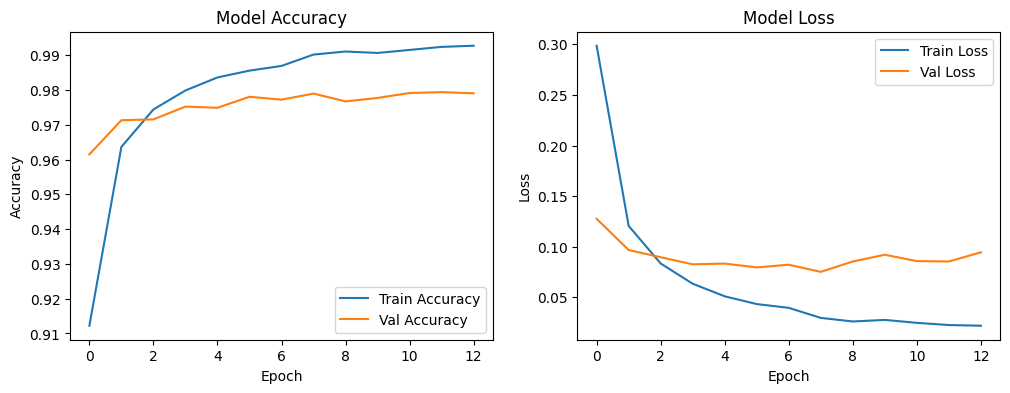

In [ ]:
plt.figure(figsize=(12, 4))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()